# Task: Apply Principal Component Analysis to reduce the dimensionality of the dataset.

In [1]:
# Importing  required packages

import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
#New dataset: Employee Job Satisfaction
data = pd.read_csv("Student_Scores.csv")

#Create DataFrame
df = pd.DataFrame(data)
df

,Student Name,Computer Science Score,Physical Education Score,Physics Score,Geography Score
0,Liam,88,81,90,76
1,Noah,92,85,87,74
2,Emma,84,79,91,68
3,Olivia,70,72,75,80
4,Sophia,65,67,69,78
5,Mason,97,92,95,85
6,Isabella,82,88,84,79
7,Mia,89,83,92,77
8,Ethan,85,87,80,82
9,Ava,72,68,74,76


In [3]:
# Standardize the Features and target variable

X = df[['Computer Science Score', 'Physical Education Score', 'Physics Score', 'Geography Score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Standardized Data:\n",X_scaled)

Standardized Data:
 [[ 0.57322195  0.09776474  0.75294024 -0.34188173]
 [ 0.9826662   0.58658846  0.39439727 -0.79772404]
 [ 0.1637777  -0.14664712  0.87245457 -2.16525095]
 [-1.26927717 -1.00208862 -1.03977462  0.56980288]
 [-1.78108249 -1.61311827 -1.75686057  0.11396058]
 [ 1.49447151  1.44202996  1.35051187  1.70940865]
 [-0.04094442  0.95320625  0.0358543   0.34188173]
 [ 0.67558301  0.3421766   0.99196889 -0.11396058]
 [ 0.26613876  0.83100032 -0.442203    1.02564519]
 [-1.06455505 -1.49091234 -1.15928895 -0.34188173]]


In [4]:
# Applying PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("PCA Transformed Data:\n", X_pca)

PCA Transformed Data:
 [[-0.78451342  0.55378932]
 [-1.0606231   0.81983105]
 [-0.29264281  2.31465888]
 [ 1.85127123 -0.72694177]
 [ 2.94916966 -0.41952028]
 [-2.6307753  -1.39366239]
 [-0.57225186 -0.49568724]
 [-1.14060886  0.36713341]
 [-0.48295275 -1.22385053]
 [ 2.16392721  0.20424956]]


In [5]:
# Convert to DataFrame

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Student Name' ] = df['Student Name' ]
print(df_pca)

        PC1       PC2 Student Name
0 -0.784513  0.553789         Liam
1 -1.060623  0.819831         Noah
2 -0.292643  2.314659         Emma
3  1.851271 -0.726942       Olivia
4  2.949170 -0.419520       Sophia
5 -2.630775 -1.393662        Mason
6 -0.572252 -0.495687     Isabella
7 -1.140609  0.367133          Mia
8 -0.482953 -1.223851        Ethan
9  2.163927  0.204250          Ava


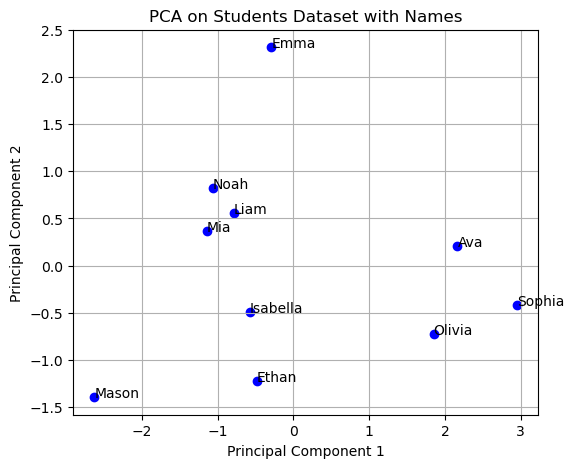

In [6]:
# Visualize the PCA results

plt.figure(figsize=(6, 5))
plt.scatter(df_pca['PC1'], df_pca['PC2'], color='blue')
for i, name in enumerate(df_pca['Student Name']):
    plt.annotate(name, (df_pca['PC1'][i], df_pca['PC2'][i]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Students Dataset with Names')
plt.grid()
plt.show()